# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_data = list()
with open('../Q3/train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('../Q3/test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

In [6]:
x_train_data = np.asarray(x_train, dtype=np.float64)
y_train_data = np.asarray(y_train, dtype=np.float64)
x_test_data=np.asarray(x_test,dtype=np.float64)
y_test_data=np.asarray(y_test,dtype=np.float64)

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

I will define a class named Linear regression, which trains the model by performing the dot products on weights and adding a bias term
The weights are updated after every epoch by performing a gradient descent and going down the curve slowly
The bias then needs to be updated after each epoch and then after each time, the bias is updated and checked
The cost function is implemented simply by taking difference between the predicted values, squaring them, summing them and dividing by shape
It can be then used to predict the models as the weights are now updated

In [7]:
# 1.3.1.2
# implement Linear Regression
import math
class LinearReg():
  
  def train(self,x_train_data,y_train_data,iters=5,alpha=0.001):

    weights=np.zeros((1,x_train_data.shape[1]))
    y_train_data.resize((y_train_data.shape[0],1))
  
    bias=np.random.randn()
    divide=(1/x_train_data.shape[0])

    for i in range(iters):

      calculated_vals=np.dot(x_train_data,weights.T)+bias
      #             25*240        240*1
      j_x=np.dot(x_train_data.T,(calculated_vals-y_train_data))
      j_b=np.sum(calculated_vals-y_train_data)
      x=weights.T- alpha*j_x*divide
      weights=x.T

      bias-= alpha*j_b*divide
    self.bias=bias
    self.weights=weights.T

  def predict(self,x_test_data):
    return np.dot(x_test_data,self.weights)+self.bias

def mse_cost_func(linear_model:LinearReg(),x_test_data,y_test_data):
  return  ((1/x_test_data.shape[0]) *np.sum(np.square(linear_model.predict(x_test_data)-y_test_data))) 

aa=LinearReg()
aa.train(x_train_data,y_train_data,iters=10000,alpha=0.03)
y_pred=aa.predict(x_test_data)


In [8]:
costs=[]
val=0.01
l=[]

for i in range(100):
    l.append(val)
    val+=0.001
for i in l:
    aa.train(x_train_data,y_train_data,iters=10000,alpha=i)
    costs.append(mse_cost_func(aa,x_test_data,y_test_data))


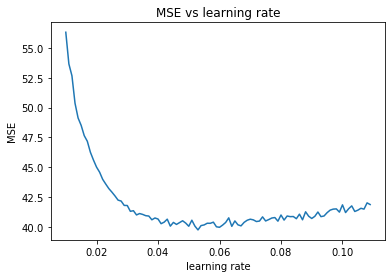

In [9]:

# plot RMSE vs alpha
plt.plot(l, costs)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title('MSE vs learning rate')
plt.show()

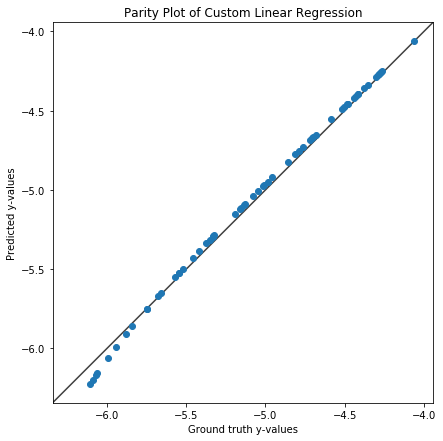

In [10]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Regularization is a technique of penalizing variables which are independented but can be correlated, the regularization term penalises them on higher terms which are dependent on each other, in ridge it is done by squaring the weights multiplied by alpha , also known as L2 norm.

In [11]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.metrics import mean_squared_error

class RidgeRegression():
  
  def train(self,x_train_data,y_train_data,iters=5,alpha=0.001,ridgecoeff=0.1):

    weights=np.zeros((1,x_train_data.shape[1]))
    y_train_data.resize((y_train_data.shape[0],1))
  
    bias=np.random.randn()
    divide=(1/x_train_data.shape[0])

    for i in range(iters):

      calculated_vals=np.dot(x_train_data,weights.T)+bias
      #             25*240        240*1
      j_x=divide*np.dot(x_train_data.T,(calculated_vals-y_train_data))+2*ridgecoeff*weights.T
      j_b=np.sum(calculated_vals-y_train_data)
      x=weights.T- alpha*j_x
      weights=x.T
      bias-= alpha*j_b*divide
    self.bias=bias
    self.weights=weights.T

  def predict(self,x_test_data):
    return np.dot(x_test_data,self.weights)+self.bias

def mse_cost_func(linear_model,x_test_data,y_test_data):
  # return  np.sqrt((1/x_test_data.shape[0]) *np.sum(np.square(linear_model.predict(x_test_data)-y_test_data))) 
  return math.sqrt(np.square(np.subtract(y_test_data,linear_model.predict(x_test_data))).mean())
aa=RidgeRegression()
aa.train(x_train_data,y_train_data,iters=10000)
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

In [12]:
# Sklearns Ridge Regression
from sklearn.linear_model import Ridge
sk_ridge=Ridge(alpha=0.9)
sk_ridge.fit(x_train_data,y_train_data)

Ridge(alpha=0.9)

The paramter with time changes its values and the RMSE decreases with increase in alpha, and reaches a minima, but as we can see in graph, the global minima was at value 0.0, which indicates that the curve could fit in completely without any penalization and the graph was a complete fit. This however is not always true because in real world datasets, parameters tend to be correlated and hence regularization is of great use there to properly modify the weights.

The parameter alpha increases importance of the penalizing value(weight squares here) and increases it as the value increases slowly after reaching a short maxima in between.

In [13]:
# costs=[]


val=0.00
l=[]
costs=[]
costs_crct=[]
for i in range(200):
    l.append(val)
    val+=0.01
costs_=[]
for i in l:
    # print(i)
    sk_ridge=Ridge(alpha=i)
    sk_ridge.fit(x_train_data,y_train_data)
    costs.append(mse_cost_func(sk_ridge,x_test_data,y_test_data))
    # costs_.append(RMSE(sk_ridge,x_test_data,y_test_data))
    costs_crct.append(mean_squared_error(y_test_data,sk_ridge.predict(x_test_data)))


In [14]:

# # plot RMSE vs alpha
# plt.plot(l,costs_crct )
# # print(costs)
# plt.xlabel('alpha rate')
# plt.ylabel('RMSE')
# plt.title('RMSE vs alpha rate')
# plt.show()

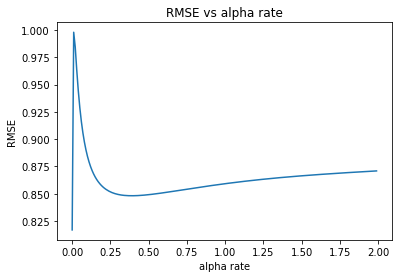

In [15]:

# plot RMSE vs alpha
plt.plot(l,costs )
# print(costs)
plt.xlabel('alpha rate')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha rate')
plt.show()

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

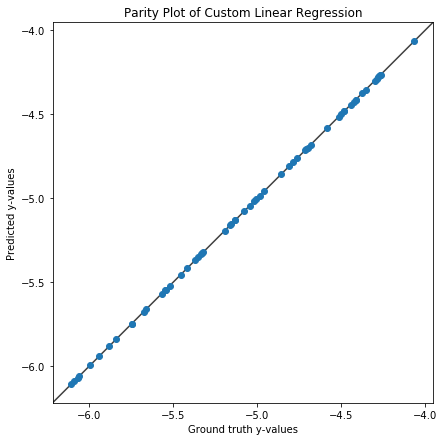

In [16]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
sk_ridge=Ridge(alpha=0)
sk_ridge.fit(x_train_data,y_train_data)
# ridge.train(x_train_data,y_train_data,alpha=0.03,ridgecoeff=0.1)
y_pred=sk_ridge.predict(x_test_data)
# print(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Regularization is a technique of penalizing variables which are independented but can be correlated, the regularization term penalises them on higher terms which are dependent on each other, in Lasso it is done by simply adding the coefficients of the function multiplied by alpha , also known as L1 norm.


In [17]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
sk_lasso=Lasso(alpha=0.01)
sk_lasso.fit(x_train_data,y_train_data)


Lasso(alpha=0.01)

In [18]:
val=0.001
l=[]
costs=[]
costs_crct=[]
for i in range(200):
    l.append(val)
    val+=0.001
for i in l:
    # print(i)
    sk_lasso=Lasso(alpha=i)
    sk_lasso.fit(x_train_data,y_train_data)
    costs.append(mse_cost_func(sk_lasso,x_test_data,y_test_data))



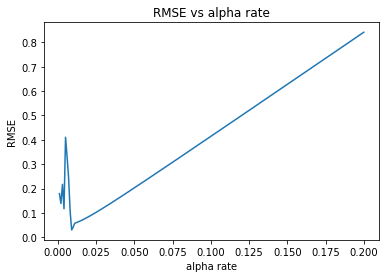

In [19]:

# plot RMSE vs alpha
plt.plot(l, costs)
# print(costs)
plt.xlabel('alpha rate')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha rate')
plt.show()

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

The parameter alpha increases importance of the penalizing value(coefficient sum here) and increases it as the value increases, after reaching a minima, showing a small dependence according the L1-norm.
As taught in class about contours, the value shows a small minima close to 0.01 in lasso regression, and it will increase after that because it is penalizing the weights heavily and hence is not useful.

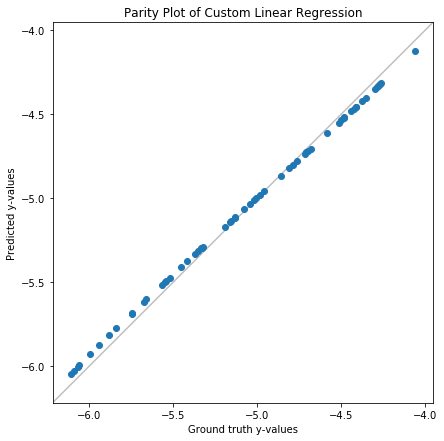

In [20]:
# 1.3.3.4
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
# ridge=RidgeRegression()
# ridge.train(x_train_data,y_train_data,alpha=0.03,ridgecoeff=0.1)
sk_lasso=Lasso(alpha=0.01)
sk_lasso.fit(x_train_data,y_train_data)

y_pred=sk_lasso.predict(x_test_data)
# print(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.25, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()